<a href="https://colab.research.google.com/github/parvathy-nsarma/Data_Mining/blob/main/CS634_Assignment1_parvathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/pantelis/PRML/blob/master/notebooks/ch01_Introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# You need to adjust the directory names below for your own account
# e.g. you may elect to create ms-notebooks dir or not

# Execute this cell once

# 1. Download the repo and set it as the current directory
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks
!git clone https://github.com/pantelis/PRML
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML





/content/drive/My Drive/Colab Notebooks/ml-notebooks
fatal: destination path 'PRML' already exists and is not an empty directory.
/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML


# New Section

In [8]:
# 2. install the project/module
!python setup.py install

running install
running bdist_egg
running egg_info
writing prml.egg-info/PKG-INFO
writing dependency_links to prml.egg-info/dependency_links.txt
writing requirements to prml.egg-info/requires.txt
writing top-level names to prml.egg-info/top_level.txt
writing manifest file 'prml.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/prml
copying build/lib/prml/__init__.py -> build/bdist.linux-x86_64/egg/prml
creating build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/probability_function.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/discrete.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/__init__.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/random_variable.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
creating build/bdist.l

In [9]:
# 3. Add the project directory to the path
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
import os, sys
sys.path.append(os.getcwd())

/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML


In [10]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

## 1.1. Example: Polynomial Curve Fitting

The cell below defines $p_{data}(y|x)$ and generates the $\hat p_{data}(y|x)$

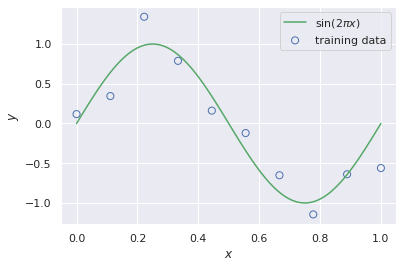

In [12]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size) # p(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape) 
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


 Parameter Table 
 M =  1
w =  [ 0.78301942 -1.63788059]

 Parameter Table 
 M =  3
w =  [ 1.13336032e-02  9.29216157e+00 -2.67894422e+01  1.70372865e+01]

 Parameter Table 
 M =  6
w =  [ 8.70379766e-02 -2.36304892e+00  9.45228619e+01 -4.28174943e+02
  7.36797688e+02 -5.63095549e+02  1.61694460e+02]

 Parameter Table 
 M =  9
w =  [ 1.17858791e-01 -3.22314291e+01  5.52576193e+02 -2.72857332e+03
  4.76278430e+03  2.03128886e+03 -1.93595365e+04  2.83824707e+04
 -1.78561842e+04  4.24672692e+03]


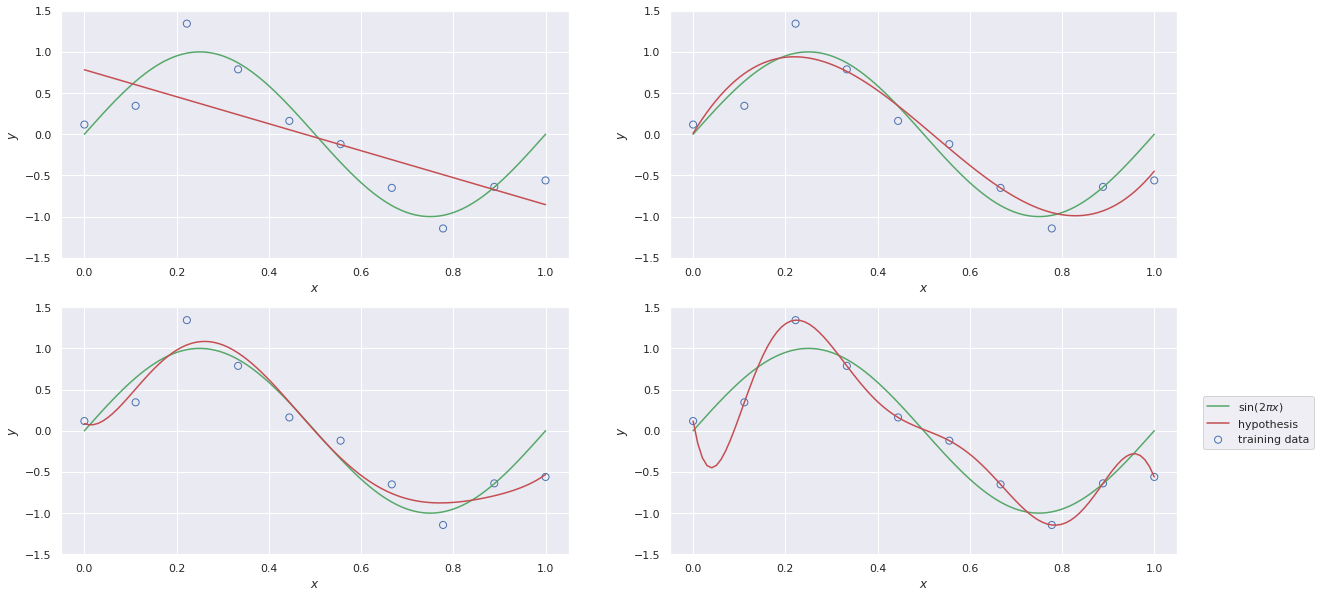

In [16]:
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([1, 3, 6, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)

    print("\n Parameter Table \n M = ", degree)
    print("w = ",model.w)
    
    
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="hypothesis")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    plt.xlabel('$x$')
    plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

In [32]:
#Squared Norm
#Squareroot of sum of weights squared that is sqrt(w1^2+w2^2+..+Wn^2)

for i, degree in enumerate([1, 3, 6, 9]):
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)

    print("\n Parameter Table \n M = ", degree)
    w = model.w
    print("w = ",w)
    print("sqrt(w^2) = ",np.sqrt(sum(w**2)))



 Parameter Table 
 M =  1
w =  [ 0.78301942 -1.63788059]
sqrt(w2) =  1.8154261903411646

 Parameter Table 
 M =  3
w =  [ 1.13336032e-02  9.29216157e+00 -2.67894422e+01  1.70372865e+01]
sqrt(w2) =  33.08002027112505

 Parameter Table 
 M =  6
w =  [ 8.70379766e-02 -2.36304892e+00  9.45228619e+01 -4.28174943e+02
  7.36797688e+02 -5.63095549e+02  1.61694460e+02]
sqrt(w2) =  1038.4442562233155

 Parameter Table 
 M =  9
w =  [ 1.17858791e-01 -3.22314291e+01  5.52576193e+02 -2.72857332e+03
  4.76278430e+03  2.03128886e+03 -1.93595365e+04  2.83824707e+04
 -1.78561842e+04  4.24672692e+03]
sqrt(w2) =  39392.84253289236


**What can you observe with respect to their squared norm ∣w∣ ?**

Squareroot of sum of weights squared that is sqrt(w1^2+w2^2+..+Wn^2).

The squared norm seems to be increasing with increase in model complexity, M. 

**Loss Function**

***Why the loss function is called Root Mean Squared Error (RMSE) and what the square root offers, if anything, to finding a better solution?***

Root Mean Square Error (RMSE) is a frequently used measure of the differences between values predicted by a model and the values observed. In other words, it tells you how concentrated the data is around the line of best fit.

The square in RMSE is used because it always gives a positive value for error, so avoiding errors cancelling each other out.

The square root is used to remove the effects of the squaring.


In [ ]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

**Model Complexity**

***The behavior of the test error for M=9 vs M=3.***

Test error is a measure of how well we are doing in predicting the values of target variable for new observation. 
Small values of Model capacity, M gives relatievely large error value (high RMSE) - Underfitting scenario.

M=3  gives the relatievely smallest error difference between training and test and the error is comparitievely smaller than M = 0 to M=2 and stays almost same till M=6 not improving further, making M = 3, the best model.

M=9 gives the least training error but difference between training and test error is higher than M=3, making it an overfit model.

#### Regularization

In [ ]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)


y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

In [ ]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression(alpha=1e-3)
    model.fit(X_train, y_train)
    
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

**Regularization**

***Read the Linear Regression notes in the course site and add a text paragraph after the regularization cell explaining the output. Create a plot of the RMSE vs model complexity with regularization.***



To avoid overfitting we have multiple strategies. One straightforward one is evident by observing the wild oscillations of weight vector, ***w*** elements as the model complexity, M increases. We can penalize such oscillations by introducing the l2 norm of ***w*** in our loss function.

We introduc a new parameter lambda,λ that regulates the relative importance of the penalty term as compared to the Mean Square Error.This parameter together with the polynomial order is what we call hyperparameters and we need to optimize them as both are needed for the determination of our final hypothesis g.

L(w)= 1/2 * i=1 to m ∑(g(**w**,xi) − yi )^2 + λ/2 * ∣∣w∣∣^2

This type of solution is called regularization and because we effectively shrink the weight dynamic range it is also called in statistics shrinkage or ridge regression.

In [ ]:
print("Create a plot of the RMSE vs model complexity with regularization.")
training_errors.append(rmse(model.predict(X_train), y_train))
test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

### 1.2.6 Bayesian curve fitting

In [ ]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()